In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

In [2]:
# task 1

df = pd.read_csv('DS3_C1_S3_SuperstoreSales_Data_Challenge.csv', index_col = 'Order Date' , parse_dates=  ['Order Date'])
df

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-08-11,1,CA-2016-152156,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-08-11,2,CA-2016-152156,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-12-06,3,CA-2016-138688,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-11-10,4,US-2015-108966,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-11-10,5,US-2015-108966,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-21,9990,CA-2014-110422,23-01-2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2017-02-26,9991,CA-2017-121258,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
2017-02-26,9992,CA-2017-121258,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


In [3]:
df.sort_index(inplace=True)
df

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-02,541,CA-2014-140795,03-02-2014,First Class,BD-11500,Bradley Drucker,Consumer,United States,Green Bay,Wisconsin,54302,Central,TEC-AC-10001432,Technology,Accessories,Enermax Aurora Lite Keyboard,468.900,6,0.0,206.3160
2014-01-03,6548,CA-2014-113880,05-03-2014,Standard Class,VF-21715,Vicky Freymann,Home Office,United States,Elmhurst,Illinois,60126,Central,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,634.116,6,0.3,-172.1172
2014-01-03,7949,CA-2014-131009,05-03-2014,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,Texas,79907,Central,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,362.250,6,0.3,0.0000
2014-01-03,7950,CA-2014-131009,05-03-2014,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,Texas,79907,Central,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.552,6,0.6,-34.9536
2014-01-03,5714,US-2014-143707,05-03-2014,Standard Class,HR-14770,Hallie Redmond,Home Office,United States,New York City,New York,10035,East,TEC-PH-10003655,Technology,Phones,Sannysis Cute Owl Design Soft Skin Case Cover ...,5.940,3,0.0,1.6038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,908,CA-2017-143259,03-01-2018,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
2017-12-30,5092,CA-2017-156720,03-01-2018,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
2017-12-30,1298,CA-2017-115427,03-01-2018,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [4]:
df = df.resample('M').mean()
df.asfreq('M')

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-31,4390.572519,53071.091603,221.020656,3.877863,0.136641,34.728661
2014-02-28,5666.325581,54521.313953,148.175674,3.709302,0.174419,30.866941
2014-03-31,5306.113095,52105.827381,326.201821,3.636905,0.186310,0.551780
2014-04-30,4372.256198,55723.347107,204.215008,3.884298,0.115702,38.025383
2014-05-31,5130.331081,48581.885135,200.269149,3.722973,0.142905,26.434121
2014-06-30,4342.510949,51229.985401,213.773946,3.627737,0.190657,32.844851
2014-07-31,5569.192308,64069.076923,226.546449,3.782051,0.183974,-11.432965
2014-08-31,4840.873333,63038.100000,252.363650,4.026667,0.157667,13.875117
2014-09-30,4679.937238,58365.087866,276.611815,3.778243,0.147155,42.812814


In [5]:
sales_df = df['Sales']

In [6]:
sales_df.isnull().sum()

0

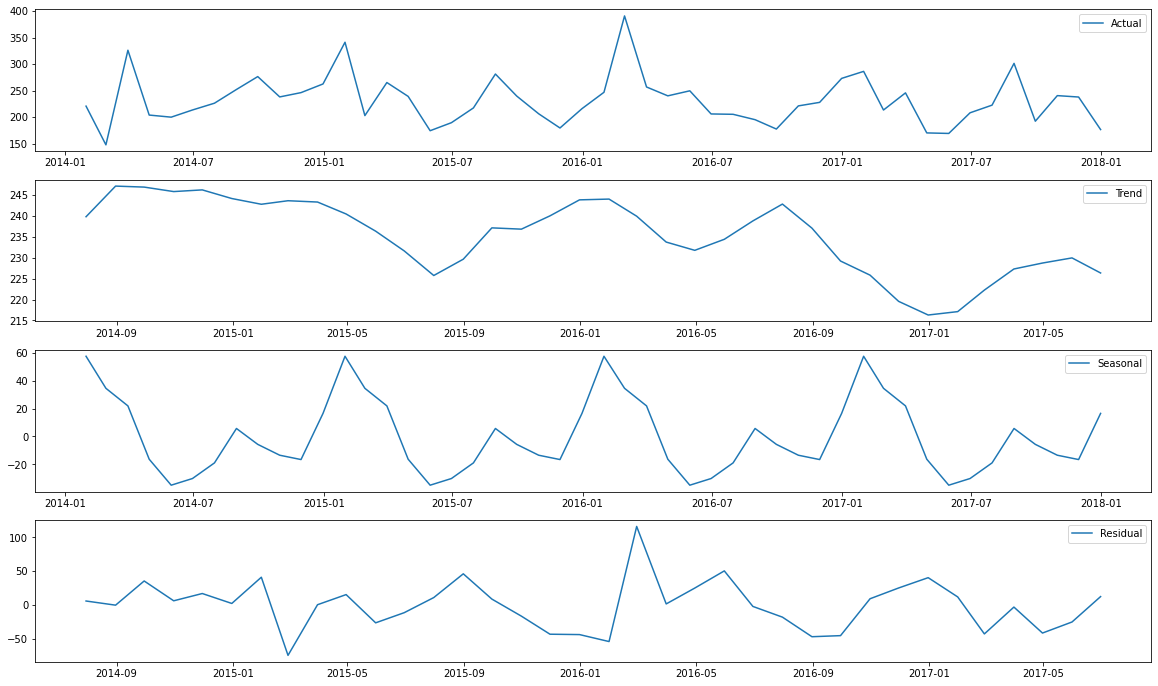

In [7]:
decomposition = seasonal_decompose(sales_df, period = 12)
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid


# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(sales_df,label='Actual')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

In [8]:
# task 2

def checkstationary(data):
    pvalue = adfuller(data)[1]
    print(pvalue)
    if pvalue < 0.05:
        msg = 'Data is Stationary'
    else:
        msg = 'Data is not stationary'
    return msg

checkstationary(sales_df)

1.4097136094620738e-07


'Data is Stationary'

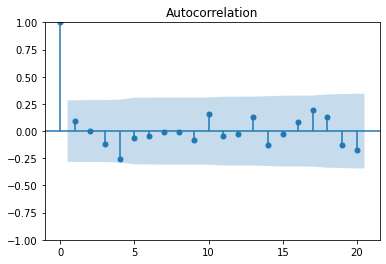

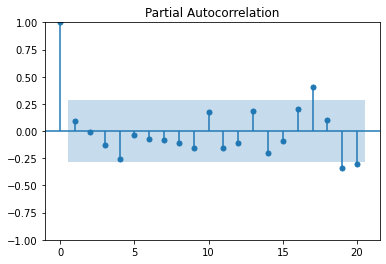

In [9]:
# task 3

plot_acf(sales_df,lags=20)
plot_pacf(sales_df,lags=20);

In [10]:
# ar
for i in range(1,12):
    mod=ARIMA(sales_df,order=(i,0,0))
    mfit=mod.fit()
    print(i,'for',mfit.aic)

1 for 509.71893134771676
2 for 511.7159387675138
3 for 512.8538424766778
4 for 512.0026596614315
5 for 513.9972737189746
6 for 515.7671546196465
7 for 517.4560339802096
8 for 519.0231557840821
9 for 520.0856673222501
10 for 520.8384132525878
11 for 521.5088821627515


In [11]:
# ma
for i in range(1,12):
    mod2=ARIMA(sales_df,order=(0,0,i))
    mfit2=mod2.fit()
    print(i,'for',mfit2.aic)

1 for 509.7228592285628
2 for 511.6930560691822
3 for 513.0712835515274
4 for 510.32121622823865
5 for 512.2435674149513
6 for 512.7668660718489
7 for 512.8180379691383
8 for 514.7213805993588
9 for 516.6553083205712
10 for 519.3758400139875
11 for 519.9228251309416


In [12]:
ml3 = ARIMA(sales_df , order = (0,0,1))
r2 = ml3.fit()
r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -251.861
Date:                Thu, 02 Mar 2023   AIC                            509.723
Time:                        03:24:20   BIC                            515.336
Sample:                    01-31-2014   HQIC                           511.844
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        231.9053      8.730     26.564      0.000     214.795     249.016
ma.L1          0.0879      0.163      0.539      0.590      -0.231       0.407
sigma2      2113.6270    381.696      5.537      0.000    1365.517    2861.738
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.49
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             1.08
Prob(H) (two-sided):                  0.46   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
ml4 = ARIMA(sales_df , order = (1,0,1))
r4 = ml4.fit()
r4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -251.895
Date:                Thu, 02 Mar 2023   AIC                            511.789
Time:                        03:24:20   BIC                            519.274
Sample:                    01-31-2014   HQIC                           514.618
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        232.0038      8.557     27.114      0.000     215.233     248.774
ar.L1         -0.5833      1.359     -0.429      0.668      -3.247       2.081
ma.L1          0.6509      1.319      0.493      0.622      -1.935       3.237
sigma2      2116.4169    388.103      5.453      0.000    1355.749    2877.085
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                16.05
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             1.10
Prob(H) (two-sided):                  0.45   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
j = int(0.8*(len(sales_df)))
train = sales_df[:j]
test = sales_df[j:]

In [15]:
ml5 = ARIMA(train , order = (1,0,1))
r5 = ml5.fit()
r5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   38
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -199.985
Date:                Thu, 02 Mar 2023   AIC                            407.970
Time:                        03:24:20   BIC                            414.520
Sample:                    01-31-2014   HQIC                           410.300
                         - 02-28-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        235.9427     10.354     22.788      0.000     215.649     256.236
ar.L1         -0.0486      2.923     -0.017      0.987      -5.777       5.680
ma.L1          0.1447      2.920      0.050      0.960      -5.579       5.868
sigma2      2180.6603    450.441      4.841      0.000    1297.811    3063.509
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.03
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             1.16
Prob(H) (two-sided):                  0.97   Kurtosis:                         4.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
# ljung

pvalue = sm.stats.acorr_ljungbox(r5.resid , lags = [1] , return_df = True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print('Reject H0')
else:
    print('Accept H0')

[0.99000156]
Accept H0


In [17]:
# task 4

predictions = r5.predict(0,len(test)-1)
predictions

Order Date
2014-01-31    235.942709
2014-02-28    234.528871
2014-03-31    227.717490
2014-04-30    245.804424
2014-05-31    231.467531
2014-06-30    233.162921
2014-07-31    234.215075
2014-08-31    235.289947
2014-09-30    237.614798
2014-10-31    239.608037
Freq: M, Name: predicted_mean, dtype: float64

In [18]:
actual = []; pred = []

for i in range(len(predictions)):
    actual.append(test.iloc[i])
    pred.append(predictions[i])

dfer = pd.DataFrame({'Actual' : actual , 'Predictions' : pred})
dfer['error'] = dfer['Actual'] - dfer['Predictions']

dfer

,Actual,Predictions,error
0,245.967381,235.942709,10.024672
1,170.620094,234.528871,-63.908776
2,169.636707,227.717490,-58.080783
3,208.481771,245.804424,-37.322653
4,222.877408,231.467531,-8.590124
5,301.495235,233.162921,68.332314
6,192.635345,234.215075,-41.579729
7,240.813096,235.289947,5.523149
8,238.149973,237.614798,0.535176
9,176.922968,239.608037,-62.685069


<AxesSubplot:>

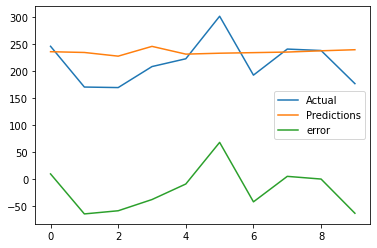

In [19]:
dfer.plot()

In [20]:
mse = mean_squared_error(dfer['Actual'] , dfer['Predictions'])

mse, np.sqrt(mse)

(1938.3362314248866, 44.02654008010267)